In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25872 sha256=36e49a3d8fbd58b873c5863b6f73cda5987b7608981d1950999ee99ef2daf3f7
  Stored in directory: c:\users\2018a00591\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cmake

Note: you may need to restart the kernel to use updated packages.


In [7]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\2018A00591\anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py39haa95532_0         937 KB
    conda-repo-cli-1.0.5       |   py39haa95532_0         122 KB
    pathlib-1.0.1              |     pyhd3eb1b0_1          17 KB
    pyjwt-2.4.0                |   py39haa95532_0          38 KB
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  pathlib            pkgs/main/noarch::pathlib-1.0.1-pyhd3eb1b0_1

The following packages will be UPDATED:

  conda-repo-cli     pkgs/main/noarch::conda-repo-cli-1.0.~ --> pkgs/main/win-64::conda-repo-cli-1.0.5-py39haa95532_0
  pyjwt                              

In [8]:
import dlib

In [4]:
# Facial landmarks with dlib, OpenCV, and PythonPython

# import the necessary packages
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2


def show_raw_detection(image, detector, predictor):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale image
    rects = detector(gray, 1)

    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # convert dlib's rectangle to a OpenCV-style bounding box
        # [i.e., (x, y, w, h)], then draw the face bounding box
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # show the face number
        cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for (x, y) in shape:
            cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

    # show the output image with the face detections + facial landmarks
    cv2.imshow("Output", image)
    cv2.waitKey(0)


def draw_individual_detections(image, detector, predictor):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale image
    rects = detector(gray, 1)

    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the landmark (x, y)-coordinates to a NumPy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # loop over the face parts individually
        for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
            # clone the original image so we can draw on it, then
            # display the name of the face part on the image
            clone = image.copy()
            cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                        0.7, (0, 0, 255), 2)

            # loop over the subset of facial landmarks, drawing the
            # specific face part
            for (x, y) in shape[i:j]:
                cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)

            # extract the ROI of the face region as a separate image
            (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
            roi = image[y:y + h, x:x + w]
            roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)

            # show the particular face part
            cv2.imshow("ROI", roi)
            cv2.imshow("Image", clone)
            cv2.waitKey(0)

        # visualize all facial landmarks with a transparent overlay
        output = face_utils.visualize_facial_landmarks(image, shape)
        cv2.imshow("Image", output)
        cv2.waitKey(0)


# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# load the input image, resize it, and convert it to grayscale
image = cv2.imread('13.jpg')
image = imutils.resize(image, width=500)
show_raw_detection(image, detector, predictor)
draw_individual_detections(image, detector, predictor)


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

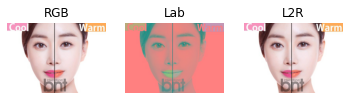

In [31]:
image = io.imread('qqq.jpg')
output1= cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
output2 = cv2.cvtColor(output1, cv2.COLOR_LAB2RGB)
# view
img_list = [image, output1,output2]
title_list = ['RGB', 'Lab','L2R']

for i in range(len(img_list)):
    plt.subplot(1, 3, i+1, )
    plt.imshow(img_list[i])
    plt.title(title_list[i])
    plt.axis('off')

plt.show()

In [14]:
# RGB -> XYZ // XYZ -> CIE-L*ab



NameError: name 'rgb2lab' is not defined

//sR, sG and sB (Standard RGB) input range = 0 ÷ 255
//X, Y and Z output refer to a D65/2° standard illuminant.

var_R = ( sR / 255 )
var_G = ( sG / 255 )
var_B = ( sB / 255 )

if ( var_R > 0.04045 ) var_R = ( ( var_R + 0.055 ) / 1.055 ) ^ 2.4
else                   var_R = var_R / 12.92
if ( var_G > 0.04045 ) var_G = ( ( var_G + 0.055 ) / 1.055 ) ^ 2.4
else                   var_G = var_G / 12.92
if ( var_B > 0.04045 ) var_B = ( ( var_B + 0.055 ) / 1.055 ) ^ 2.4
else                   var_B = var_B / 12.92

var_R = var_R * 100
var_G = var_G * 100
var_B = var_B * 100

X = var_R * 0.4124 + var_G * 0.3576 + var_B * 0.1805
Y = var_R * 0.2126 + var_G * 0.7152 + var_B * 0.0722
Z = var_R * 0.0193 + var_G * 0.1192 + var_B * 0.9505

In [364]:
def sRGB2XYZ(sR,sG, sB):
    var_R = float( sR / 255 )
    var_G = float( sG / 255 )
    var_B = float( sB / 255 )
    if ( var_R > 0.04045 ):
        var_R = (( var_R + 0.055 ) / 1.055 )**2.4
    else:
        var_R = var_R / 12.92
    if( var_G > 0.04045 ):
        var_G = ( ( var_G + 0.055 ) / 1.055 )**2.4
    else:
        var_G = var_G / 12.92
    if( var_B > 0.04045 ):
        var_B = ( ( var_B + 0.055 ) / 1.055 ) **2.4
    else:
        var_B = var_B / 12.92

    var_R = var_R * 100
    var_G = var_G * 100
    var_B = var_B * 100
    
    X = round(var_R * 0.4124 + var_G * 0.3576 + var_B * 0.1805, 1)
    Y = round(var_R * 0.2126 + var_G * 0.7152 + var_B * 0.0722, 1)
    Z = round(var_R * 0.0193 + var_G * 0.1192 + var_B * 0.9505, 1)
    return X,Y,Z

In [389]:
sRGB2XYZ(251, 206, 177)

(69.8, 67.8, 51.0)

//Reference-X, Y and Z refer to specific illuminants and observers.
//Common reference values are available below in this same page.

var_X = X / Reference-X
var_Y = Y / Reference-Y
var_Z = Z / Reference-Z

if ( var_X > 0.008856 ) :
    var_X = var_X ^ ( 1/3 )
else                    var_X = ( 7.787 * var_X ) + ( 16 / 116 )
if ( var_Y > 0.008856 ) var_Y = var_Y ^ ( 1/3 )
else                    var_Y = ( 7.787 * var_Y ) + ( 16 / 116 )
if ( var_Z > 0.008856 ) var_Z = var_Z ^ ( 1/3 )
else                    var_Z = ( 7.787 * var_Z ) + ( 16 / 116 )

CIE-L* = ( 116 * var_Y ) - 16
CIE-a* = 500 * ( var_X - var_Y )
CIE-b* = 200 * ( var_Y - var_Z )

In [374]:
# //Reference-X, Y and Z refer to specific illuminants and observers.
# //Common reference values are available below in this same page.
def XYZ2LAB(X, Y, Z): #85.584  123.299  63.748
    R_X = 85.5842315637069#86.044
    R_Y = 99.50229200493791#99.502
    R_Z = 63.74763842008234#64.256
    var_X = float(X / R_X)
    var_Y = float(Y / R_Y)
    var_Z = float(Z / R_Z)

    if ( var_X > 0.008856 ):
        var_X = var_X ** ( 1/3 )
    else:
        var_X = ( 7.787 * var_X ) + ( 16 / 116 )
    if ( var_Y > 0.008856 ):
        var_Y = var_Y ** ( 1/3 )
    else:
        var_Y = ( 7.787 * var_Y ) + ( 16 / 116 )
    if ( var_Z > 0.008856 ):
        var_Z = var_Z ** ( 1/3 )
    else:
        var_Z = ( 7.787 * var_Z ) + ( 16 / 116 )

    CIE_L = str(round(( 116 * var_Y ) - 16,3)) + "%"
    CIE_a = str(round(500 * ( var_X - var_Y ),3))+ "%"
    CIE_b = str(round(200 * ( var_Y - var_Z ),3)) + "%"
    return CIE_L,CIE_a,CIE_b

In [390]:
XYZ2LAB(69.8, 67.8, 51.0) #lab(48.367%, -19.139%, 41.262%)

('86.076%', '27.168%', '-9.673%')

### -------------------------------------------------------------------------------------------------

In [418]:
# //Reference-X, Y and Z refer to specific illuminants and observers.
# //Common reference values are available below in this same page.
# // Illuminant = D65, Observer = 2°, 
# 	$x /= 95.047;
# 	$y /= 100.00;
# 	$z /= 108.883;
# // Illuminant = D65, Observer = 10°, 
# 	//$x /= 94.8110;
# 	//$y /= 100.00;
# 	//$z /= 107.304;
def XYZ2LAB(X, Y, Z): 
    R_X = 94.8110#95.047
    R_Y = 100.00
    R_Z = 107.304#108.88
    var_X = float(X / R_X)
    var_Y = float(Y / R_Y)
    var_Z = float(Z / R_Z)
#16/116 > 0.1379310344827586
    if ( var_X > 0.0088564516790356 ):
        var_X = var_X ** ( 1/3 )
    else:
        var_X = ( 7.787 * var_X ) + ( 0.1379310344827586)
    if ( var_Y > 0.0088564516790356 ):
        var_Y = var_Y ** ( 1/3 )
    else:
        var_Y = ( 7.787 * var_Y ) + ( 0.1379310344827586 )
    if ( var_Z > 0.0088564516790356 ):
        var_Z = var_Z ** ( 1/3 )
    else:
        var_Z = ( 7.787 * var_Z ) + ( 0.1379310344827586 )

    CIE_L =( 116 * var_Y ) - 16
    CIE_a = (500 * ( var_X - var_Y ))
    CIE_b = (200 * ( var_Y - var_Z ))
    return CIE_L,CIE_a,CIE_b

In [419]:
XYZ2LAB(69.8, 67.8, 51.0)

(85.90634386618137, 12.22545430919697, 19.620295497169103)

In [420]:
#LAB>XYZ

def LAB2XYZ(L,A,B):
    var_Y = L/116 + 0.1379310344827586
    var_X = A / 500 + var_Y
    var_Z = var_Y - B/200
    if ( var_X > 0.2068965517241379 ):
        var_X = var_X ** ( 3 )
    else:
        var_X = ( var_X / 7.787) - 0.0177129876053369
    if ( var_Y > 0.2068965517241379 ):
        var_Y = var_Y ** ( 3 )
    else:
        var_Y = (var_Y / 7.787) - 0.0177129876053369
    if ( var_Z > 0.2068965517241379 ):
        var_Z = var_Z ** ( 3 )
    else:
        var_Z = (var_Z / 7.787) - 0.0177129876053369
    var_X *= 95.047
    var_Y *= 100.000
    var_Z *= 108.883
    return var_X,var_Y,var_Z

In [422]:
LAB2XYZ(85.90634386618137, 12.22545430919697, 19.620295497169103)

(69.97374355296324, 67.8, 51.750475285171106)

In [423]:
XYZ2LAB(69.97374355296324, 67.8, 51.750475285171106)

(85.90634386618137, 12.599743767522043, 18.858435987432642)

In [424]:
LAB2XYZ(85.90634386618137, 12.599743767522043, 18.858435987432642)

(70.1479195818892, 67.8, 52.51199396551186)

In [425]:
XYZ2LAB(70.1479195818892, 67.8, 52.51199396551186)

(85.90634386618137, 12.974343524308152, 18.092857687289342)

In [426]:
LAB2XYZ(85.90634386618137, 12.974343524308152, 18.092857687289342)

(70.32252916328085, 67.8, 53.28471854680933)

In [427]:
sRGB2XYZ(230,230,250)

(78.2, 80.3, 101.8)

In [428]:
XYZ2LAB(78.2, 80.3, 101.8)

(91.81929910805874, 4.167882602046314, -10.62489608874182)

In [429]:
LAB2XYZ(91.81929910805874, 4.167882602046314, -10.62489608874182)

(78.39465251922242, 80.29999999999998, 103.29800753000818)